# Online Retail Exploratory Data Analysis with Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data

In [87]:
import sys
print(sys.executable)


c:\Users\buddh\AppData\Local\Programs\Python\Python312\python.exe


In [ ]:
df = pd.read_excel(
    r"C:\\Users\\buddh\\OneDrive\\Desktop\\Projects\\Python_projects\\Project -1\\Dataset\\Online_retail.xlsx"
)



In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [62]:
df.shape

(541909, 8)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Find the rows where 'InvoiceNo' contains "C" in their values

In [89]:
df[df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


### Data Understanding & Quality

In [90]:
print("Number of missing values per column:")
print(df.isnull().sum())

print("---------------------------------------------------------------------------------------------")

print("Number of unique values per row:")
print(df.nunique())

Number of missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
---------------------------------------------------------------------------------------------
Number of unique values per row:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


### Replacing missing customer identifiers and removing incomplete product records for data consistency

In [91]:
# Replace missing CustomerIDs with 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna("Unknown")

# Remove rows with missing product descriptions
df = df[df['Description'].notna()]


### Removing non-essential identifier columns to focus on analytical features

In [92]:
columns_to_drop = ["InvoiceNo", "StockCode"]
df.drop(columns=columns_to_drop, inplace=True)

In [93]:
df.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Removing duplicate records and validating the updated dataset structure

In [94]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534532 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  534532 non-null  object        
 1   Quantity     534532 non-null  int64         
 2   InvoiceDate  534532 non-null  datetime64[ns]
 3   UnitPrice    534532 non-null  float64       
 4   CustomerID   534532 non-null  object        
 5   Country      534532 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.5+ MB


### Creating a transaction-level revenue feature by calculating gross sales per item

In [95]:
# Calculate the gross amount for each transaction (Quantity * UnitPrice)
df = df.assign(Gross=df['Quantity'] * df['UnitPrice'])
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [96]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Gross
count,534532.000000,534532,534532.000000,534532.000000
mean,9.701713,2011-07-04 14:03:41.833828096,4.644063,18.184379
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:58:00,1.250000,3.750000
50%,3.000000,2011-07-20 10:51:00,2.080000,9.900000
75%,10.000000,2011-10-19 10:31:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.789309,NaN,97.424304,381.403007


### Summarizing typical transaction values through median statistics

In [97]:
# Calculate measures of central tendency
median = df.median(numeric_only=True)
median

Quantity     3.00
UnitPrice    2.08
Gross        9.90
dtype: float64

### Extracting month and year from invoice dates for time-based analysis

In [98]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M').copy()

# Print the DataFrame with the 'MonthYear' column
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


### Visualizing monthly gross sales trends using a line chart

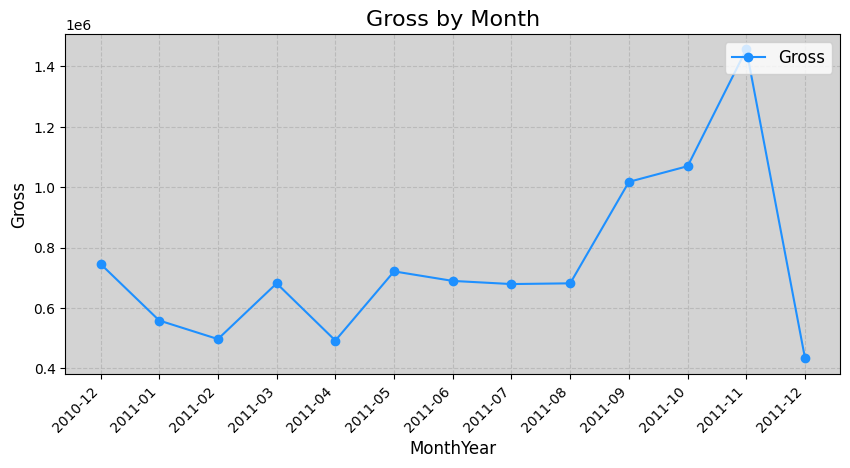

In [99]:
import numpy as np

# Group the data by 'MonthYear' and calculate the gross purchase for each month
monthly_data = df.groupby('MonthYear')['Gross'].sum().reset_index()

# Convert the 'MonthYear' column to string format
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a colorful plot with markers and lines
plt.plot(monthly_data['MonthYear'], monthly_data['Gross'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Gross by Month', fontsize=16)
plt.xlabel('MonthYear', fontsize=12)
plt.ylabel('Gross', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Add more colors and styles if needed
# Example: ax.spines['top'].set_color('none')

plt.show()  # Show the colorful plot

### Analyzing sales distribution to determine peak month and day of the week

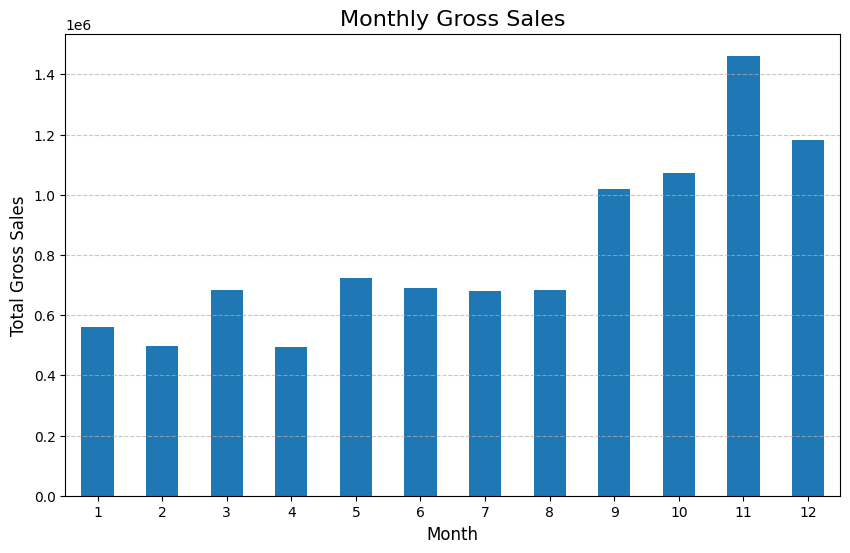

In [100]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')

plt.title('Monthly Gross Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Gross Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


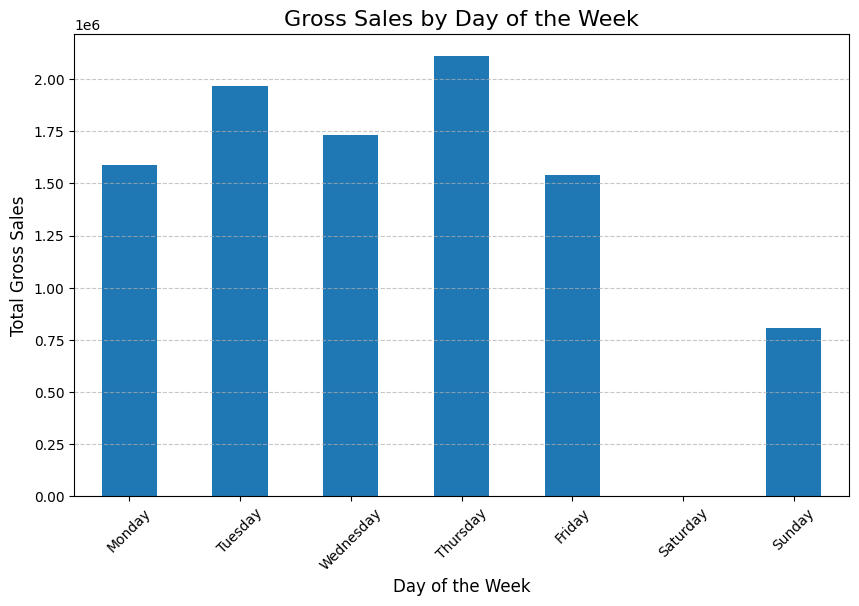

In [101]:
plt.figure(figsize=(10, 6))
daily_sales.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar')

plt.title('Gross Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Gross Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Comparing weekday-wise gross sales to identify peak selling days

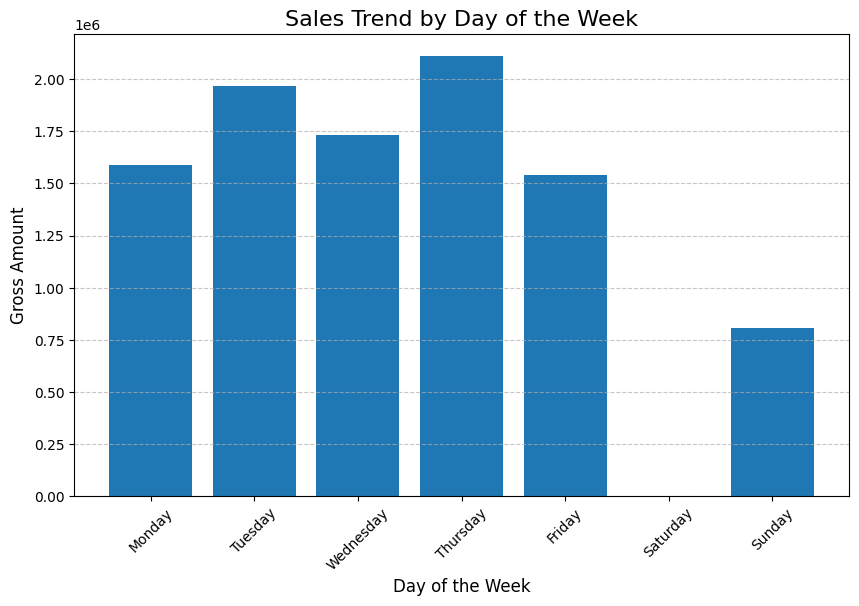

In [102]:
# Ensure all days of week are present
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales_full = daily_sales.reindex(days_of_week, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(daily_sales_full.index, daily_sales_full.values)

plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Visualizing the top revenue-contributing customers, including unidentified customers

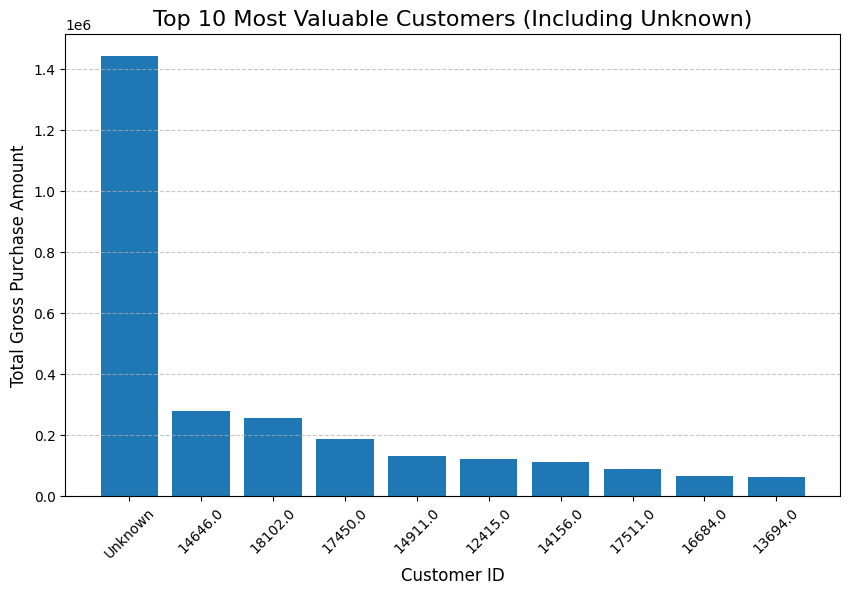

In [103]:
# Select top 10 customers INCLUDING 'Unknown'
top_10_customers = most_valuable_customers_df.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    top_10_customers['CustomerID'].astype(str),
    top_10_customers['Gross']
)

# Labels and title
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Gross Purchase Amount', fontsize=12)
plt.title('Top 10 Most Valuable Customers (Including Unknown)', fontsize=16)

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Visualizing the top revenue-contributing customers, excluding unidentified customers

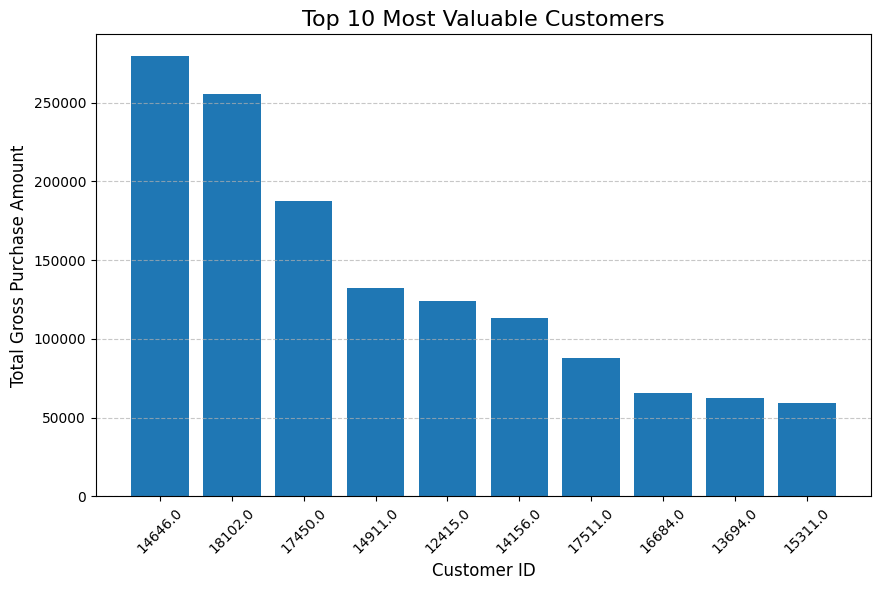

In [104]:
# Remove 'Unknown' customer for clear visualization (recommended)
filtered_customers = most_valuable_customers_df[
    most_valuable_customers_df['CustomerID'] != 'Unknown'
]

# Select top 10 customers
top_10_customers = filtered_customers.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    top_10_customers['CustomerID'].astype(str),
    top_10_customers['Gross']
)

# Labels and title
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Gross Purchase Amount', fontsize=12)
plt.title('Top 10 Most Valuable Customers', fontsize=16)

# Improve readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Visualizing the top 10 items based on total gross sales contribution

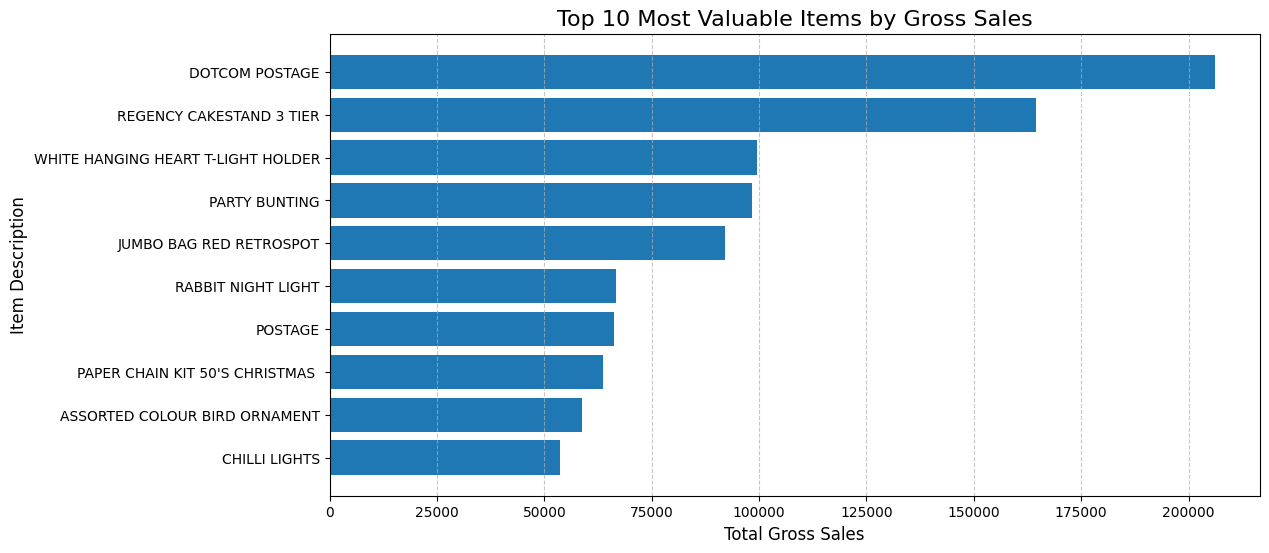

In [105]:
# Select top 10 items
top_10_items = most_valuable_items_df.head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.barh(
    top_10_items['Description'],
    top_10_items['Gross']
)

# Labels and title
plt.xlabel('Total Gross Sales', fontsize=12)
plt.ylabel('Item Description', fontsize=12)
plt.title('Top 10 Most Valuable Items by Gross Sales', fontsize=16)

# Improve readability
plt.gca().invert_yaxis()  # Highest value on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


### Visualizing the top 10 countries based on total gross sales contribution

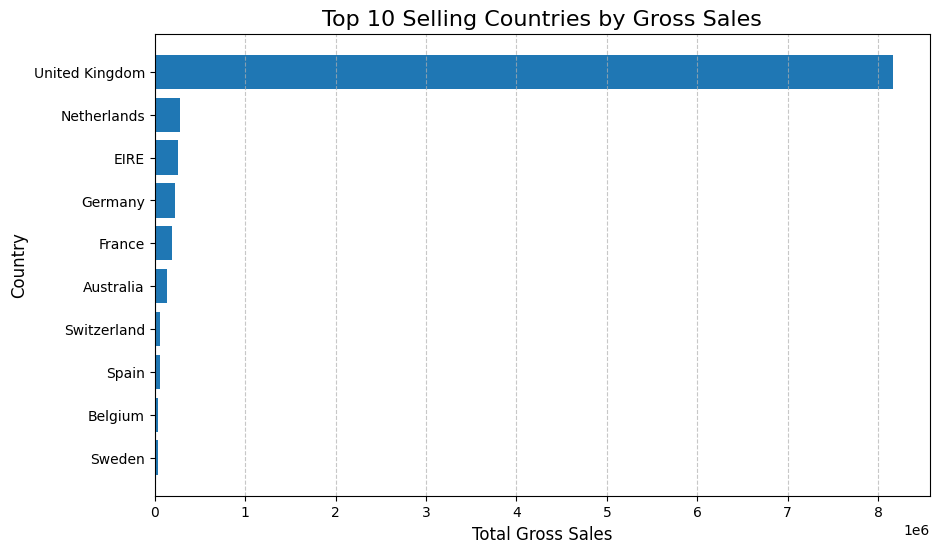

In [106]:
# Select top 10 selling countries
top_10_countries = top_selling_country_df.head(10)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_countries['Country'],
    top_10_countries['Gross']
)

# Labels and title
plt.xlabel('Total Gross Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 10 Selling Countries by Gross Sales', fontsize=16)

# Improve readability
plt.gca().invert_yaxis()  # Highest sales on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


### Analyzing the distribution of transaction-level gross amounts using a box plot

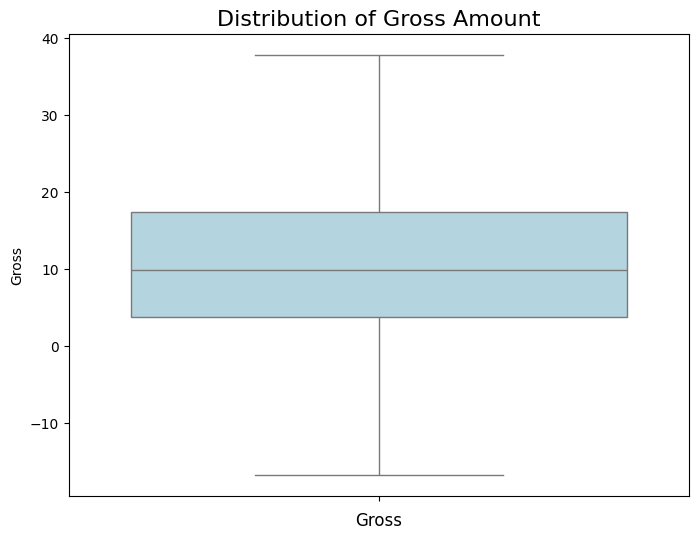

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Gross' column
sns.boxplot(data=df, y='Gross', color='lightblue', showfliers=False)  # showfliers=False to remove outliers

# Add a title and labels
plt.title('Distribution of Gross Amount', fontsize=16)
plt.xlabel('Gross', fontsize=12)

# Show the plot
plt.show()

In [108]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(df['Gross'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = df[outlier_mask]

outliers.shape

(396, 8)

In [109]:
# Remove outliers from the main dataset
without_outliers_online_retail = df[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()
summary_without_outliers

,Quantity,InvoiceDate,UnitPrice,Gross
count,534136.000000,534136,534136.000000,534136.000000
mean,9.408417,2011-07-04 14:01:15.043920896,3.813369,17.671839
min,-9600.000000,2010-12-01 08:26:00,0.000000,-1126.000000
25%,1.000000,2011-03-28 11:51:00,1.250000,3.750000
50%,3.000000,2011-07-20 10:51:00,2.080000,9.900000
75%,10.000000,2011-10-19 10:31:00,4.130000,17.400000
max,12540.000000,2011-12-09 12:50:00,1154.670000,1158.000000
std,47.548170,NaN,15.533642,44.696246


In [84]:
df.describe() # Statistical Summary of data with outliers

,Quantity,InvoiceDate,UnitPrice,Gross
count,534532.000000,534532,534532.000000,534532.000000
mean,9.701713,2011-07-04 14:03:41.833828096,4.644063,18.184379
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:58:00,1.250000,3.750000
50%,3.000000,2011-07-20 10:51:00,2.080000,9.900000
75%,10.000000,2011-10-19 10:31:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.789309,NaN,97.424304,381.403007


### Visualizing the distribution of gross sales after removing outliers

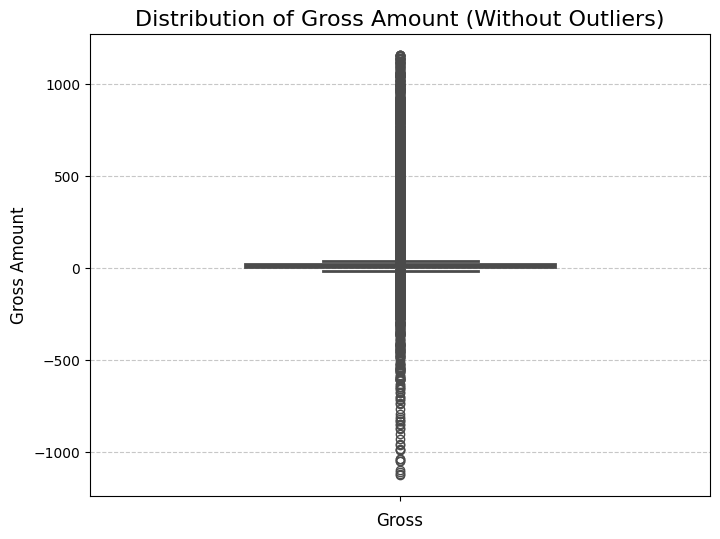

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.boxplot(
    data=without_outliers_online_retail,
    y='Gross',
    color='steelblue',   # single color instead of palette
    width=0.5,
    linewidth=2
)

plt.title('Distribution of Gross Amount (Without Outliers)', fontsize=16)
plt.xlabel('Gross', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
